
#Exercise 1.


In [1]:
import numpy as np

In [2]:

from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

import scipy as sp
from scipy.integrate import odeint
import matplotlib.pyplot as plt


In [3]:
from scipy.integrate import solve_ivp

In [4]:
def f(t,y):
  return y**2-y**3



In [ ]:
f(2,2)

-4

In [ ]:
delta=0.02


In [5]:
def time_interval(delta,time_steps):
  t_span=[0,(2/delta)]
  t_eval=np.linspace(0,(2/delta),time_steps)
  return t_span, t_eval


In [6]:
def ODEsolve(delta, t_span, t_eval):
  y0=[delta]
  #t_span=[0,2/delta]
  #t_eval=np.linspace(0,2/delta,100)
  sol= solve_ivp(f,t_span=t_span,y0=y0,t_eval=t_eval,dense_output=True)
  return sol


In [7]:
delta=0.02
t_span1,t_eval1=time_interval(delta,200)
sol_1=ODEsolve(delta,t_span1,t_eval1)

delta=0.0001
t_span2,t_eval2=time_interval(delta,100)
sol_2=ODEsolve(delta,t_span2,t_eval2)



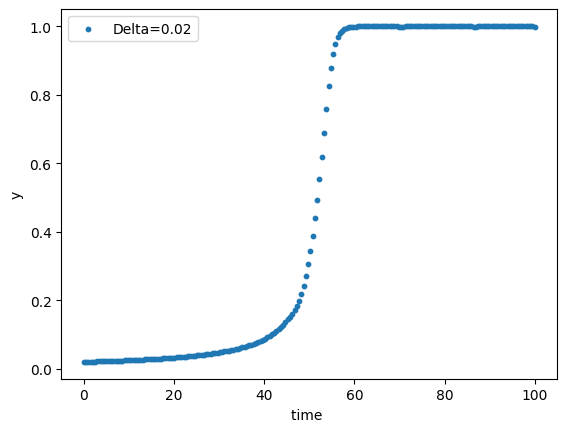

In [8]:
plt.scatter(t_eval1,sol_1.y,s=10, label='Delta=0.02')

#plt.scatter(t_eval2,sol_2.y,s=10,label='Delta=0.0001')
plt.xlabel('time ')  # Adding a title to the x-axis
plt.ylabel('y')  # Adding a title to the y-axis
plt.legend()
plt.show()

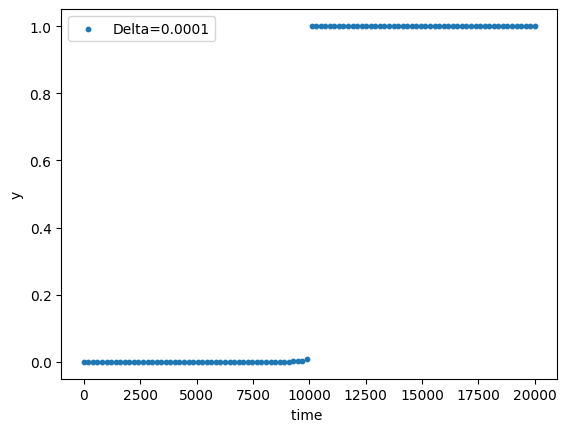

In [9]:

plt.scatter(t_eval2,sol_2.y,s=10,label='Delta=0.0001')
plt.xlabel('time ')  # Adding a title to the x-axis
plt.ylabel('y')  # Adding a title to the y-axis
plt.legend()
plt.show()

Runge-Kutta

Order 2.

In [10]:
def rk2(y,h):
  k1 =f(0, y) #h*f(0, y)
  k2 =f(0,y+0.5*h*k1)
  #y = y + k2
  return k1, k2

In [11]:
def rk3(y,k1, k2,h):
  k3=f(0,y+(3/4)*h*k2)
  y_3=h*((2/9)*k1+(1/3)*k2+(4/9)*k3)
  return k3,y_3

In [13]:
def Rk_twostage(delta,time_steps):

  #delta=  0.02
  # Two stage explicit Runge-Kutta
  #time_steps=200
  x = 0
  y =delta
  x_values = []
  y_values = []
  #error=[]
  h=(2/delta)/time_steps
  for i in range(time_steps):
    y_star=y+0.5*h*f(0,y)
    y_next=y+h*f(0,y_star)
    y=y_next
    x=x+h
    x_values.append(x)
    y_values.append(y)
  return x_values,y_values

In [14]:
x_values,y_values=Rk_twostage(0.02,200)

In [15]:
delta=0.02
time_steps=200
t_span1,t_eval1=time_interval(delta,time_steps)
sol_1=ODEsolve(delta,t_span1,t_eval1)

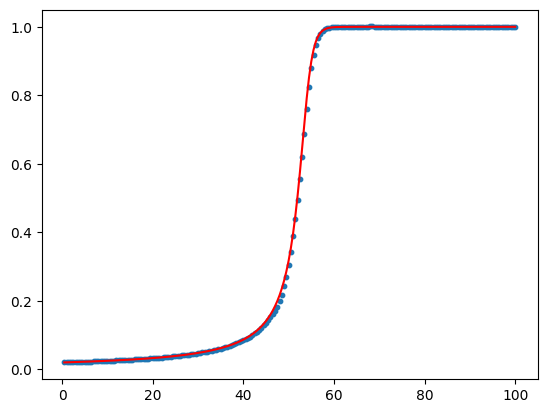

In [16]:
plt.plot(x_values,y_values, color='r',label='Runge-Kutta two-stage')
plt.scatter(x_values, sol_1.y,s=10, label='Scipy solve_ivp')

In [30]:
# Runge-Kutta embedded methode 3 order with 2 order embedded
# Without adaptive step
def Rk_emb23(delta,time_steps):
  t = 0
  #tol=0.000001
  y = delta
  t_values = []
  y2_values = []
  y3_values = []
  error=[]
  h=(2/delta)/time_steps
  end_point=2/delta
  #for i in range(time_steps):
  while t<end_point:
    k1,k2= rk2(y,h)
    k3, y_new=rk3(y,k1,k2,h)
    y3=y+y_new # Third order
    k4=f(0,y3)
    y2 = y + (7/24)*h*k1+(1/4)*h*k2+(1/3)*h*k3+(1/8)*h*k4 # Second order
    t = t + h
    err_abs=np.abs(y3-y2)
    err_rel=err_abs/max(np.abs(y3), 1e-6)
    err=err_abs
    #+err_rel
    error.append(err)
    t_values.append(t)
    y2_values.append(y2)
    y3_values.append(y3)
    y=y3

  global_err=np.sum(error)
  return t_values,y2_values,y3_values, error, global_err


In [31]:
t_values,y2_values,y3_values, error, global_err=Rk_emb23(0.02,200)

In [32]:
global_err
#0.002410408222690716 200

0.0008023123997722148

In [33]:
delta=0.02
h=(2/delta)/time_steps
end_point=2/delta

TypeError: unsupported operand type(s) for /: 'float' and 'list'

In [22]:
def step_size(time_steps):
  return (2/delta)/time_steps

In [23]:
time_steps=[200,400,600,800,1000,1200]

In [24]:
test=map(step_size,time_steps)

In [25]:
list(test)

[0.5, 0.25, 0.16666666666666666, 0.125, 0.1, 0.08333333333333333]

In [34]:
global_err =[Rk_emb23(delta, t)[-1] for t in time_steps]


In [35]:
global_err

[0.0008023123997722148,
 0.00021284815193311005,
 9.58618177909279e-05,
 5.435444781573193e-05,
 3.49021910894462e-05,
 2.4305645095760303e-05]

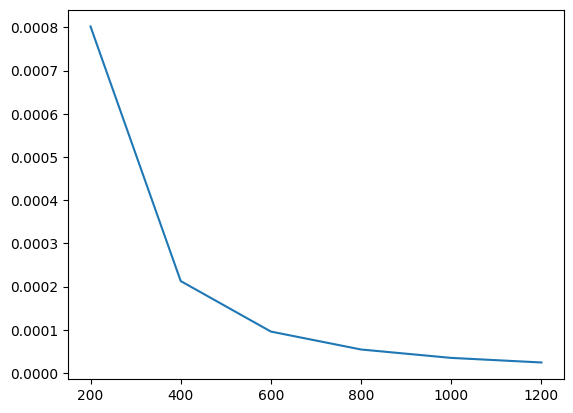

In [36]:
plt.plot(time_steps,global_err)
plt.show()

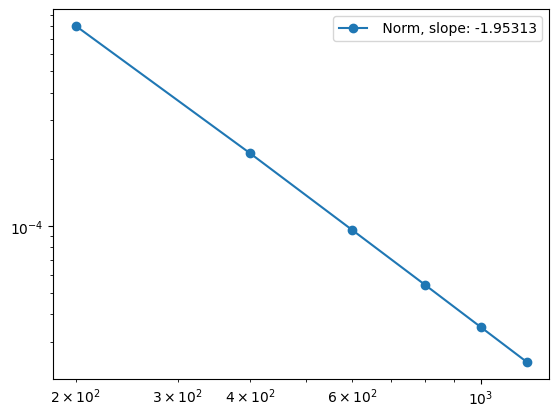

In [37]:
# order of convergence
slope = np.polyfit(np.log(time_steps), np.log(global_err), 1)[0]
plt.loglog(time_steps, global_err, "o-", label=f" Norm, slope: {slope:.5f}")
plt.legend()
plt.show()

In [ ]:
2/delta/200

0.5

In [38]:
# Runge-Kutta embedded methode 3 order with 2 order
def Rk_emb23_adaptive(delta,time_steps,tol):
  t = 0
  #tol=0.000001
  y = delta
  t_values = []
  y2_values = []
  y3_values = []
  error=[]
  h=(2/delta)/time_steps
  end_point=2/delta
  #for i in range(time_steps):
  while t<end_point:
    k1,k2= rk2(y,h)
    k3, y_new=rk3(y,k1,k2,h)
    y3=y+y_new # Third order
    k4=f(0,y3)
    y2 = y + (7/24)*h*k1+(1/4)*h*k2+(1/3)*h*k3+(1/8)*h*k4 # Second order
    t = t + h
    err_abs=np.abs(y3-y2)
    #err_rel=err_abs/max(np.abs(y3), 1e-6)
    err=err_abs
    #+err_rel
    if err<tol:
      error.append(err)
      t_values.append(t)
      y2_values.append(y2)
      y3_values.append(y3)
      y=y3
    h = h*0.8*(tol/err)**(1/3)

  global_err=np.sum(error)
  return t_values,y2_values,y3_values, error, global_err


In [56]:
t_values,y2_values,y3_values, error, global_err=Rk_emb23_adaptive(0.02,200,0.000001)

In [57]:
len(t_values)

165

In [58]:
delta=0.02
t_span2,t_eval2=time_interval(delta,200)
sol_2=ODEsolve(delta,t_span2,t_eval2)


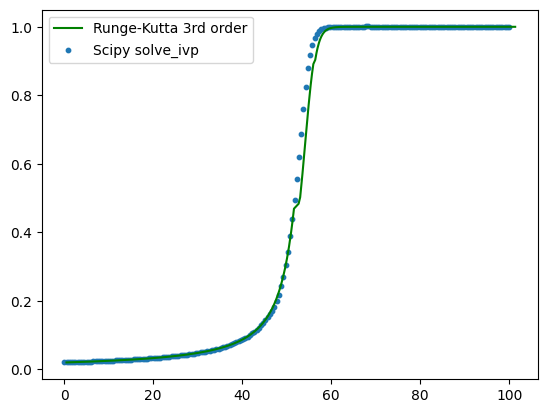

In [59]:
#plt.plot(t_values,y2_values, color='r',label='Runge-Kutta 2nd order')
plt.plot(t_values,y3_values, color='g',label='Runge-Kutta 3rd order')
plt.scatter(t_eval2, sol_2.y,s=10, label='Scipy solve_ivp')
plt.legend()

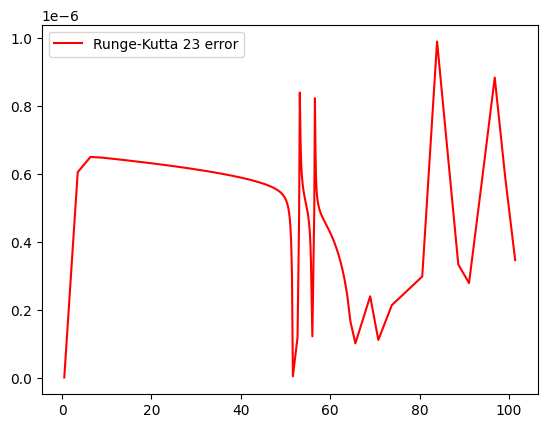

In [60]:

plt.plot(t_values,error, color='r',label='Runge-Kutta 23 error')
#plt.scatter(t_eval, sol.y, label='Scipy solve_ivp')
plt.legend()

In [ ]:
Global_error=np.sum(error)

In [ ]:
print('Global_error', Global_error)
# Global_error 0.002410408222690716 ved 200

Global_error 0.001103422478981416


Order 3.

# Exercise 2.

In [ ]:
from functools import partial

In [ ]:
epsilon=0.1

alpha=np.array([1,4,16])
a=np.ones(3)
b=np.zeros(3)

In [ ]:
b

array([0., 0., 0.])

In [ ]:
def u(x,t):
  u_new=0.0
  for i in range(3):
    u_new +=np.exp(-epsilon*alpha[i]*t)*(a[i]*np.cos(alpha[i]*x)+b[i]*np.sin(alpha[i]*x))
  return u_new

In [ ]:
u(-2,0)

0.27257649015075425

In [ ]:
u_initial=partial(u,t=0) # initial conditions

In [ ]:
u_initial(-2)

0.27257649015075425

In [ ]:
u_bound_left=partial(u,x=-1)

In [ ]:
u_bound_right=partial(u,x=1)

In [ ]:
u(-1,1)

-0.14261279312945802

In [ ]:
u_bound_left(t=1)

-0.14261279312945802

In [ ]:
# params for x
N=10
h=2/N

In [ ]:
u_initial(-1)

-1.0710007953188567

In [ ]:
# vend det om
h=0.1
N=2/h

In [ ]:
N

20.0

In [ ]:
# params for t
M=10
k=0.01

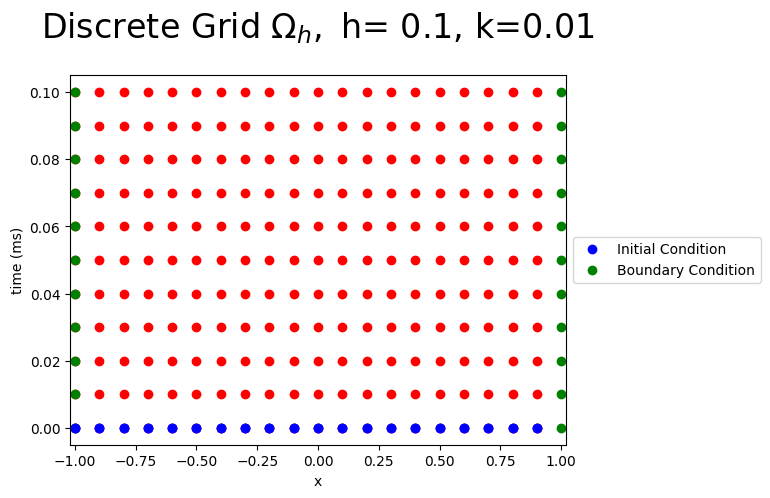

In [ ]:
#Nt=1000
time_steps=M
time=np.arange(0,(time_steps+1)*k,k)
#time=np.arange(0,time_steps,k)
x=np.arange(-1,1,h)
X, Y = np.meshgrid(x, time)
fig = plt.figure()
plt.plot(X,Y,'ro');
plt.plot(x,0*x,'bo',label='Initial Condition');
#plt.plot(np.ones(time_steps+1),time,'go',label='Boundary Condition');
plt.plot(-1*np.ones(time_steps+1),time,'go',label='Boundary Condition');
plt.plot(np.ones(time_steps+1),time,'go');
plt.plot(x,0*x,'bo');
#plt.plot(0*time,time,'go');
plt.xlim((-1.02,1.02))
plt.xlabel('x')
plt.ylabel('time (ms)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(r'Discrete Grid $\Omega_h,$ h= %s, k=%s'%(h,k),fontsize=24,y=1.08)
plt.show();

In [ ]:
r=(epsilon*k)/h**2

A=diags([[r], [(1-2*r)], [r]], [-1, 0, 1],
                     shape=(9,9))

In [ ]:
r

0.09999999999999998

In [ ]:
(1-2*r)

0.8

In [ ]:
A.toarray()

array([[0.8, 0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.1, 0.8, 0.1, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.1, 0.8, 0.1, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.1, 0.8, 0.1, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.1, 0.8, 0.1, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.1, 0.8, 0.1, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.1, 0.8, 0.1, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.8, 0.1],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.8]])

In [ ]:
def f(x):
  return 2*x

In [ ]:
v=np.arange(0,(2+0.5),0.5)
g=[f(l) for l in v]


In [ ]:
v

array([0. , 0.5, 1. , 1.5, 2. ])

In [ ]:
g

[0.0, 1.0, 2.0, 3.0, 4.0]

In [ ]:
N=10

In [ ]:
k

0.01

In [ ]:
M

10

In [ ]:
# t endpoint
endp=10
# Resolution
M=100
# step size
k=endp/M

In [ ]:
# (x,t)

# t>0
t=np.arange(k,(M+k),k)
g_l=[u_bound_left(t=y) for y in t]

# Initial condition -1<= x <=1
x=np.arange(-1,(1+2/N),2/N)
u_start=[u_initial(x=v) for v in x]

r=(epsilon*k)/h**2

A=diags([[r], [(1-2*r)], [r]], [-1, 0, 1],
                     shape=(int(N+1),int(N+1)))
u=np.zeros((int(M+1),int(N+1)))
u[0,:]=u_start
i=0
# len(M)=M+1
while i<M:
  t=0+i*k
  u[i+1,:]=A.dot(u[i,:])
  u[i+1,0]=u_bound_left(t=i)
  u[i+1,-1]=u_bound_right(t=i)
  i +=1



#w=np.zeros((int(N)+1,M+1))
#b=np.zeros(N-1)
# Initial Condition
# This in only interior points
#for i in range(0,int(N)+1):
#    w[i,0]=u_unit(i)
#w[-1,0]=u_unit(-1)
#w[1,0]=u_unit(1)

# Boundary Condition
#for j in range(1,M):
#    w[-1,j]=0
#    w[1,j]=0

#fig = plt.figure(figsize=(8,4))
#plt.plot(x,w[:,0],'o:',label='Initial Condition')
#plt.plot(x[[0,N]],w[[0,N],0],'go',label='Boundary Condition t[0]=0')
#plt.plot(x[N],w[N,0],'go')
#plt.xlim([-0.1,1.1])
#plt.ylim([-0.1,1.1])
#plt.title('Intitial and Boundary Condition',fontsize=24)
#plt.xlabel('x')
#plt.ylabel('w')
#plt.legend(loc='best')
#plt.show()